# Днес ще говорим за:

* Невронните мрежи и техните свойства
* Многослоен персептрон (Multilayer perceptron) 
* Активационни функции
* Обратно разпространение на сигнала (Backpropagation)

In [2]:
import math

import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

%matplotlib inline
sns.set()

# Как работят невронните мрежи (Neural networks, NN)? 

Този модел на обработка на информацията е вдъхновен от структурата на мозъка на биологичните организми: невронът приема сигнали от невроните, с които е свързан, обработва ги и предава информация на свързаните с него неврони от мрежата. 

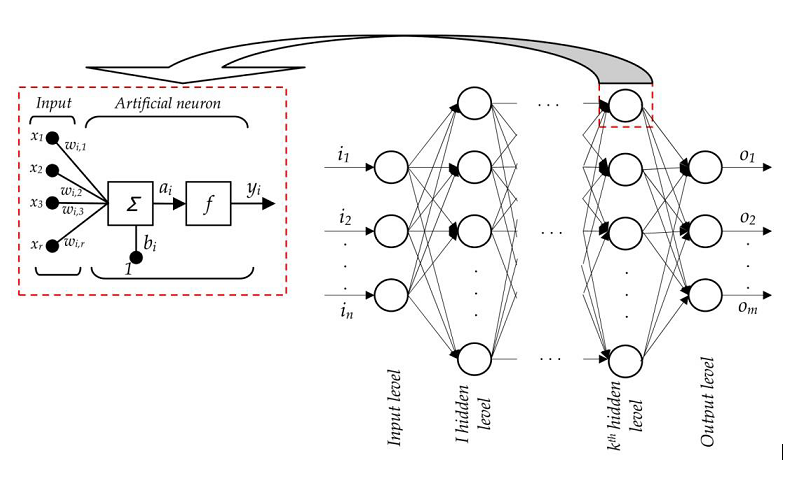

Всеки неврон (напр. $i$ –тият от даден слой или ниво) събира всичката входна информация ($x_j$) към него, обобщава я с определени тегла (${w_i,_j}$), обработва междинния резултат ($a_i$) чрез активиращата функция ($f$) и предава резултата ($y_i$) на всички свързани с него неврони от следващия слой. 
Към входните данни се добавя отклонение ($b_i$, bias), чиято тежест е 1 (така се избягва случаят всички тегла да са нула).


 Невронната мрежа се формира от три типа слоеве:    
- **Входен слой (Input layer)**: Невроните от този слой приемат наблюденията ($i_1$, $i_2$, … , $i_n$). На всеки входен елемент се съпоставя тегло съответно на неговата значимост. (Теглата са въведени по подобие на синаптичните импулси, предавани между биологичните неврони. Отрицателна стойност на теглото съответства на потискащ импулс, а положителна – на възбуждащ.)
- **Скрити слоеве (Hidden layers)**: Това са междинните слоеве между входа и изхода, които помагат на невронната мрежа да научи сложните взаимоотношения, свързани с данните (в някои случаи тези слоеве може да не съществуват); 
- **Изходен слой (Output layer)**: Невроните от този слой извличат крайния резултат ($o_1$, $o_2$, … , $o_m$) от предишните два слоя. 


# Защо ни трябват невронни мрежи?

In [3]:
def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

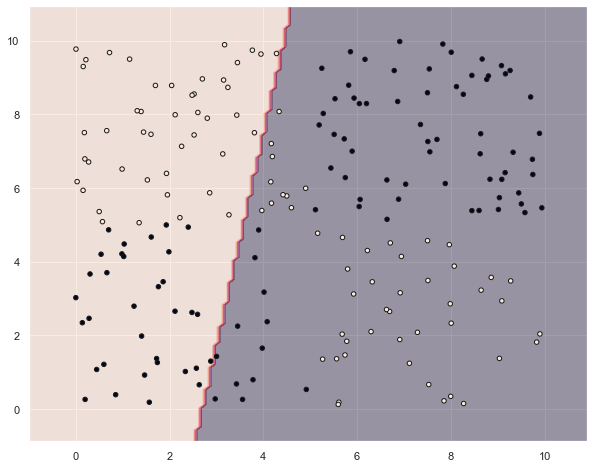

In [4]:
np.random.seed(1)
X = np.random.rand(200, 2) * 10
y = np.logical_xor(X[:, 0] > 5, X[:, 1] > 5)

lr = LogisticRegression().fit(X, y)
plot_boundary(lr, X, y)

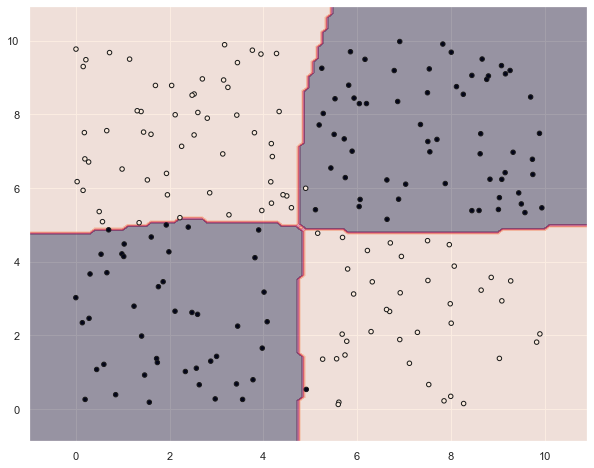

In [5]:
mlp = MLPClassifier(100, max_iter=2000, random_state=1).fit(X, y)
plot_boundary(mlp, X, y)

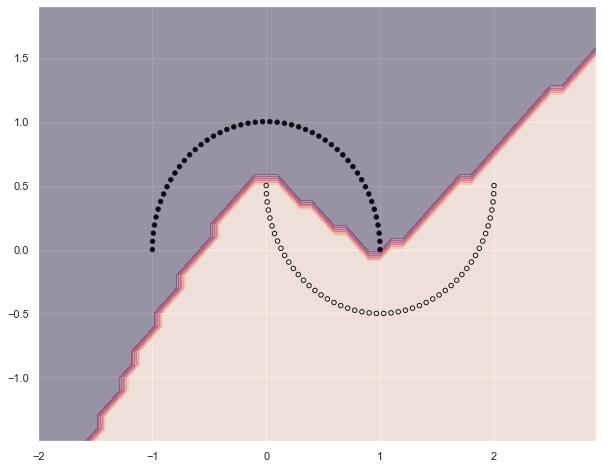

In [6]:
X, y = make_moons()
plot_boundary(mlp.fit(X, y), X, y)

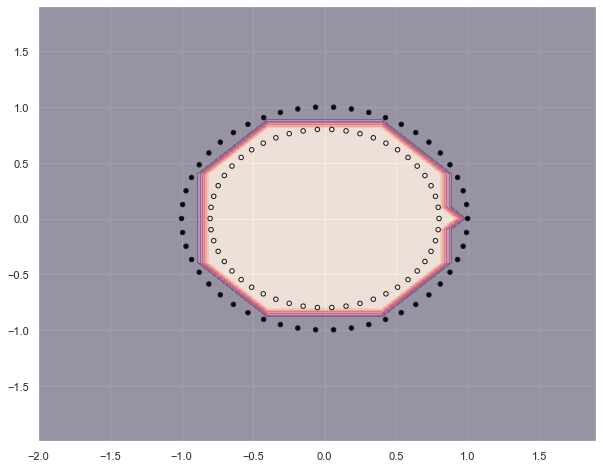

In [7]:
X, y = make_circles()
plot_boundary(mlp.fit(X, y), X, y)

Ясно - Невронните мрежи могат да апроксимират всяка функция.

Да видим обаче какво стои зад `MLP`.

In [44]:
mlp

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1)

In [47]:
Повече - в (документацията в sklearn)[https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html].

SyntaxError: invalid syntax (<ipython-input-47-2a7069c00ca5>, line 1)

# Параметри на мрежите:

* Архитектура
* Брой слоеве
* Брой неврони във всеки слой
* Активираща функция
* Правило за обновяване на теглата и скорост на обучение (learning rate)
* Размер на "партидата"
* Регуларизации
* И други 

In [9]:
x = np.linspace(-10, 10)

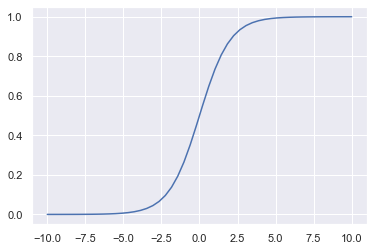

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x));

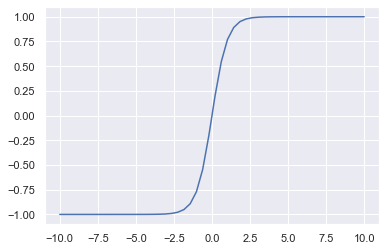

In [11]:
plt.plot(x, np.tanh(x));

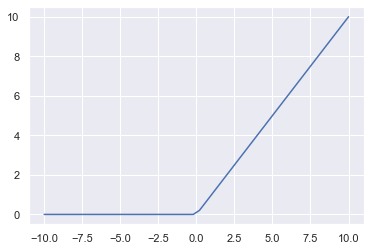

In [12]:
def relu(x):
    z = x > 0
    return x*z

plt.plot(x, relu(x));

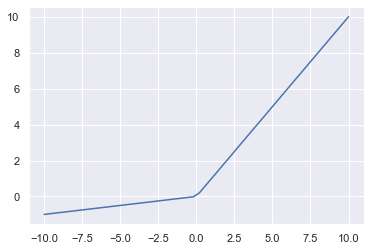

In [13]:
def leaky_rely(x, leakage = 0.1):
        x = np.copy(x)
        x[x < 0] *= leakage
        return x

plt.plot(x, leaky_rely(x));    

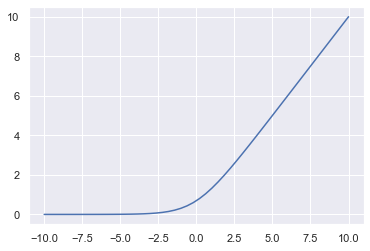

In [14]:
def softplus_function(x):
    return np.log(1 + np.exp(x))

plt.plot(x, softplus_function(x));        

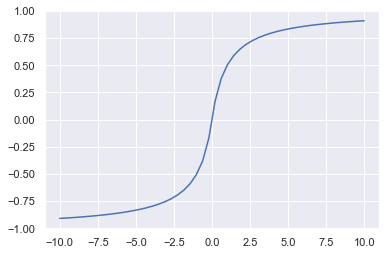

In [15]:
def softsign_function(x):
    return x / (1 + np.abs(x))

plt.plot(x, softsign_function(x));        

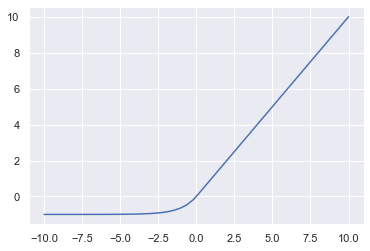

In [16]:
def elu(x, alpha=1):
    x = x.copy()
    neg_indices = x < 0
    x[neg_indices] = alpha * (np.exp(x[neg_indices]) - 1)
    return x

plt.plot(x, elu(x));

# Да ги видим заедно:

In [17]:
def plot_activations():
    x = np.linspace(-5, 5)
    plt.figure(figsize=(12,8))
    plt.plot(x, sigmoid(x));
    plt.plot(x, list(map(np.math.tanh, x)));
    plt.plot(x, relu(x));
    plt.plot(x, leaky_rely(x));    
    plt.plot(x, softplus_function(x));        
    plt.plot(x, softsign_function(x));        
    plt.plot(x, elu(x));
    plt.legend([
        "sigmoid",
        "tanh",
        "relu",
        "leaky_rely",
        "softplus_function",
        "softsign_function",
        "elu",
    ])

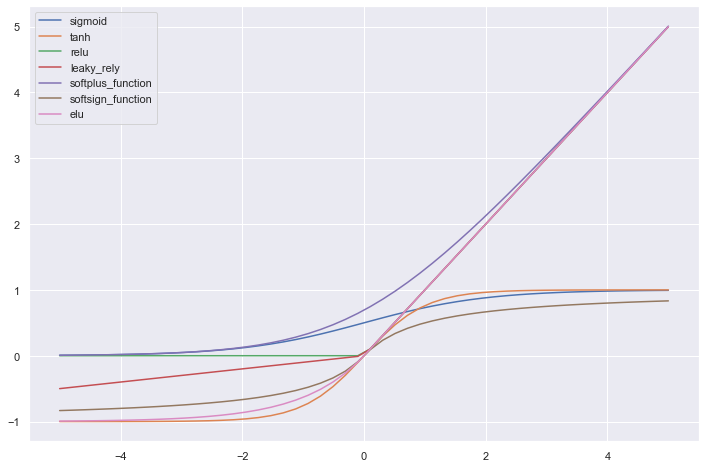

In [18]:
plot_activations()

# Последна активация за днес - `Softmax`


$$ \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}} $$

* a.k.a. Normalized exponential function 

In [19]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

x = [0.1, 0.2, 0.6, 0.9]
print(x, "\n", softmax(x))

x = [0.1, 0.2, 0.1, 0.9]
print(x, "\n", softmax(x))

[0.1, 0.2, 0.6, 0.9] 
 [0.16723993 0.18482871 0.27573204 0.37219932]
[0.1, 0.2, 0.1, 0.9] 
 [0.18759221 0.20732145 0.18759221 0.41749413]


Можем да използваме softmax за предвиждане на множество класове.

Sigmoid щеше да връща отделна вероятност за всеки възможен клас - подобно на One vs All стратегията.

http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/

# Невронните мрежи работят в два режима:

## За предсказване позлва "forward pass"

* Пресмятат се всички изчисления в графа за подадените X, W, b и активации.

## За да оптимизира теглата W и b се ползва "back propagation"

* Пресмята градиентите, чрез частните производни на изхода спрямо входа.
* Използва градиентите за да обнови теглата чрез `"the update rule"`.

# Forward pass

# При логистична регресия:

$$ \hat{y} = \sigma(w^Tx+b) = \sigma(b + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n) $$

Където:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
- $w$ e вектор.
- $b$ е скалар. 
- $x$ е вектор със стойности, но операциите могат да бъдат "векторизарани" и $X$ да е матрица, съдържаща стойностите за всички семпли от данните.


Броя на параметрите ($W$ и $b$) е: $n + 1$, където е $n$ е броя фичъри.

Примерно, ако имаме 1000 фичъра ще имаме 1001 параметри (тегла) на логистичната регресия.

В случая на NN това е само един от невроните в някой от слоевете.

# При 2-слойна NN:

$$ h_1 = g(W_1^Tx+b_1) $$
$$ \hat{y} = \sigma(W_2^T h_1 + b_2 )$$

Където:

$$ \sigma(z) \text{ - логистична функция (сигмоид)}$$ 
$$ g(z) \text{ - някоя активация}$$ 


за всеки неврон в $h_1$, имаме:
$$ h_{1(i)} = g(W_{1(i)}^T x+b_i) $$

Във втория слой има само 1 неврон. Ако приемем, че резултатите след активацията в $h_1$ са нови фичъри - $x_2$, то:
$$ \hat{y} = \sigma(w_2^T x_2 + b_2 ) \text{ - е логистична регресия, която работи с новите фичъри $x_2$.} $$

$W_1$ - е матрица, съдържаща теглата за всяко $x$ за всеки от невроните в слой 1.

$b_1$ - вектор съдържащ отклонението (bias) за всеки от невроните в слой 1.

Аналогично за слой 2.

# Да погледнем отново 3-слойна NN:
![](imgs/simple_neural_network_header.jpg)

In [20]:
print("n_layers_:", mlp.n_layers_)
print("n_outputs_:", mlp.n_outputs_)
print("hidden_layer_sizes:", mlp.hidden_layer_sizes)

n_layers_: 3
n_outputs_: 1
hidden_layer_sizes: 100


In [21]:
W1, W2 = mlp.coefs_

print(W1.shape, W2.shape)

(2, 100) (100, 1)


# Брой тегла в `MLP`, който ползвахме в началото.

* `W1` - (2, 100) 
* `W2` - (100, 1)


* `x` съдържа 2 характеристики
* `W1` - 2 реда, 100 колони - Има 100 неврона във слой 1. Всеки от тези 100 неврона ще има по две тегла за двете характеристики.
* `W2` - 100 реда, 1 колона - Има само 1 изходен неврон (класификация или регрисия). Този неврон има 100 тегла, за 100-те неврона от предходния слой.

Аналогично за `intercept`. Всеки неврон се нуждае от собствен `intercept`.

In [22]:
b1, b2 = mlp.intercepts_
print(b1.shape, b2.shape)

# b1 - 100 intercepts - one for each of the neurons in h1
# b2 - a intercetp for the final classification neuron (logistic regression)

(100,) (1,)


# Брой на теглата в скрития слой:

$W_1$ – бр. на фичърите * бр. на скритите неврони 
<br/>$b_1$ – бр. на скритите неврони
<br/>$h_1$ – общо $W_1$ + $b_1$ 

За слой 1:

* Вход: 2 фичъра
* Скрит слой 1: 100 неврона
* Изход: 1 неврон

бр. теглата $= 2 * 100 + 100 = 300 $


### Колко е броя на параметрите за слой 2?

# Време е да видим нещо по-яко (демо):

http://playground.tensorflow.org/

# Обратно предаване на сигнала (Backpropagation)

Backpropagation е алгоритъма, който изплозваме за да намерим подходящи тегла за модела.

Видео - [Backpropagation in 5 Minutes](https://www.youtube.com/watch?v=q555kfIFUCM&ab_channel=SirajRaval).

Серия от видеа, които подробно описват невронните мрежи, градиентото спускане (gradient descent) и backpropagation: [тук](https://www.youtube.com/watch?v=aircAruvnKk&ab_channel=3Blue1Brown).

# Използва "update rule":

$$W_{current} = W_{current} - \alpha \nabla J(W_{current}) $$

Това вече го показвахме.

# Има различни функции на грешката (cost functions):

Регресия:
$$
J(W)
= \frac{1}{2m}\sum_{i=1}^m \Big(\hat{y_i} - y_i\Big) ^ 2
$$

Класификация:

$$
J(W) =  - \frac {1}{m} \sum_{i=1}^ m \sum_{j=1}^l y_{ij}\ln(p_{ij} ) 
$$

Където:

* $m  \in \mathbb{N}$ – броя на елементите в множеството данни
* $l \in \mathbb{N}$ – броя класове
* $y_{ij} \in \{0, 1\}$ – 1 ако $i$-тия елемент е от клас $j$, иначе 0
* $p_{ij} \in [0, 1]$ – вероятността (според модела) $i$-тия елемент да е от клас $j$

Това също е показвано.

# Градиента се смята по-сложно отколкото при логистичната регресия.

Заради това ще добавим още две техники:
* Computational Graph
* Chain Rule

# Computational Graph
С графа, разделяме сметките на най-простите им компоненти. Пример:
    
$ \hat y = \sigma\big( g(x W_1 + b) W_2 + b_2\big)$
<br/>Ще го раздробим на части:
<br/>
<br/>$ op_1 = x W_1  + b $
<br/>$ op_2 = g( op_1) $
<br/>$ op_3 = op_2 * W_2 + b_2 $
<br/>$ op_4 = \sigma (op_3) $

Да добавим и грешката:
<br/>$ op_5 = J(op_4) $

# Верижно правило (Chain Rule)

"Chain rule" е фомрула за пресмятане на производните на композитни функции:


Нека $F = f ∘ g$, или $F(x) = f(g(x))$ за всяко $x$. Тогава:
$$ F'(x)=f'(g(x))g'(x) $$
или ако $ z=f(y)$ и $y=g(x) $, тогава:

$$\frac{dz}{dx}={\frac{dz}{dy}}\cdot {\frac  {dy}{dx}}$$

Тези две техники ни позволяват да намерим градиента за всяко `W` и `b`:
$$\frac{\partial}{\partial w} J(W)$$



# За регресия е малко по-лесно:

$ \hat y =  g(W_1 X + b) W_2 + b_2$
<br/>
<br/>$ op_1 = W_1 x + b $
<br/>$ op_2 = \sigma( op_1) $
<br/>$ op_3 = op_2 * W_2 + b_2 = \hat y $
<br/>$ op_4 = J(op_3) $, където $J(W) = \frac {1}{2} \big ( \hat y -  y \big ) ^2 $


$$\frac {\partial op_4} {\partial W_2  } = \frac {\partial } {\partial W_2  } \frac {1} {2} \big ( op3 - y \big )^2 = $$

$$ = (op3 - y) \frac {\partial } {\partial W_2  } \big ( op3 - y\big ) =$$

$$ = (op3 - y) \frac {\partial } {\partial W_2  } \big ( op_2 * W_2 + b_2 - y\big ) =$$

$$ = (op3 - y) op_2 $$

Накратко:

$$\frac {\partial op_4} {\partial W_2  } = (op3 - y) op_2 $$

Ако търсим градиента с респект към $b$, ще получим 1 във втората част на произвадната и резултатът ще е:

$$\frac {\partial op_4} {\partial b_2  } = (op3 - y) $$


Не се наложи да използваме производната на `sigmoid`, но в следващата стъпка се налага за това ще запишем дефиницията:

$$\frac {\partial \sigma(x)} {\partial x} = \sigma(x)(1 - \sigma(x))$$


Да видим една стъпка назад към $W_1$

$$\frac {\partial op_4} {\partial W_1  } = \frac {\partial } {\partial W_1  } \frac {1} {2} \big ( op3 - y \big )^2 = $$

$$ = (op3 - y) \frac {\partial } {\partial W_1  } \big ( op_2 * W_2 + b_2 - y\big ) =$$

$$ = (op3 - y) \frac {\partial } {\partial W_1  } \big ( op_2 * W_2\big ) =$$

$$ = (op3 - y) W_2 \frac {\partial } {\partial W_1  } \big ( \sigma(op1) \big ) =$$

$$ = (op3 - y) W_2 \frac {\partial } {\partial W_1  } \big ( \sigma(W_1x+b)\big ) =$$

$$ = (op3 - y) W_2 \lbrack \sigma(op1)(1-\sigma(op1) \big \rbrack \big ( \frac {\partial } {\partial W_1  }(W_1x+b)\big ) =$$

$$ = (op3 - y) W_2 \lbrack op2(1-op2) \rbrack \big ( x \big )$$




Аналогично за $b_1$:
$$\frac {\partial op_4} {\partial b_1  } =  (op3 - y) W_2 \lbrack op2(1-op2) \rbrack $$

# Aко заменим $x$ с $op_{n}$ - може да продължим нагоре по графа за още скрити слоеве.


След като сме пресметнали градиентите, можем да използваме "the update rule" за да обновим параметрите на модела.

[Backpropagation math example](http://briandolhansky.com/blog/2013/9/27/artificial-neural-networks-backpropagation-part-4)

Случайно инициализиране на $W$

* Какво ще се случи ако всички тегла са 0 или 1?

Когато пресметнем градиентите, можем да обновяваме теглата чрез "the update rule".

Обаче също има различни разновидности и параметри:

Gradient descent variants
* Batch gradient descent
* Stochastic gradient descent
* Mini-batch gradient descent
* Decaying Learning Rate

Gradient descent optimization algorithms:
* Momentum
* Nesterov accelerated gradient
* Adagrad
* Adadelta
* RMSprop
* Adam
* и др.

Decaying Learning Rate:
    
$$ W = W - \frac {\alpha} {i} \nabla J(W) $$


Exponential decay:

$$ W = W - \alpha \cdot 0.99^i \nabla J(W) $$


$i$ - номер на итерация

# Адаптивни алгоритми

Използват различен скорост за учене за всяка итерация, за всяко от теглата.

Така могат да обновяват с по-голяма стъпка параметри, които са по редки (спарс фичъри) и с по-малки стъпки, тези които се срещат във всяка итерация.

* Adagrad
* Adadelta
* RMSprop

* Започват с `Ada` и можете да ги погледнете в google. 

# Кой алгоритъм за обновяване на теглата да ползваме?

* Ако искате най-добрите резултати, ще трябва да правите grid search с параметрите на всички.
* Adam дава много добри резултати в повечето случаи със стойностите по подразбиране.

[И един хубав туториъл за оптимизационните алгоритми](http://ruder.io/optimizing-gradient-descent/index.html).

# Graph

Целта на графа е да вкараме всички операции от примера и да имаме автоматично диференциране и обновяване на теглата.

## Елементите на графа трябва да имат следните функционалности:
* `forward` - пресямата операцията.
* `backward` - пресмята и запомня градиентите за текущата операция.
* `update weights` - обновява теглата с помощтта на "the update rule".

## Изпълниние на графа:
* Когато се изпълнява, графа първо ще извика `forward` за всеки от елементите и ще запази стойностотите им.
* След което преизползваме стойностите в `backward pass`, изпълнявайки го върху елементите в обратен ред.
* Накрая чрез  `update_wights` ще извадим пресметнатите градиенти от съответните им тегла.

# Ще направим граф за многослойна NN за регресия.

## За улеснение няма да е точно граф - по-точно няма да има разклонения.
Ще започнем отзад напред и първо ще дефинираме `MSE` - `op4` от примера. 
* Последната операция (cost) - няма да имплементира `update_weights` по очевидни причини. 

# Да погледнем отново какви са стъпките в графа за регресия:


$ \hat y =  g(X W_1 + b) W_2 + b_2$
<br/>
<br/>$ op_1 = X W_1 + b $
<br/>$ op_2 = \sigma( op_1) $
<br/>$ op_3 = op_2 * W_2 + b_2 = \hat y $
<br/>$ op_4 = J(op_3) $, където $J(W) = \frac {1}{2} \big ( \hat y -  y \big ) ^2 $



In [23]:
class MSE:
    def __init__(self, y):
        self.y = y

    def forward(self, X):
        self.X = X.ravel()
        first_term = 1. / (2. *len(X))
        norm = np.linalg.norm(self.y - X)
        self.value = first_term * np.square(norm)
        return self.value

    def backward(self, _):
        dX = self.X - self.y
        return dX

# Да видим пак `backward pass` на графа.

$$\frac {\partial op_4} {\partial W_2  } = \frac {\partial } {\partial W_2  } \frac {1} {2} \big ( op3 - y \big )^2 = $$

$$ = (op3 - y) \frac {\partial } {\partial W_2  } \big ( op3 - y\big ) =$$

$$ = (op3 - y) \frac {\partial } {\partial W_2  } \big ( op_2 * W_2 + b_2 - y\big ) =$$

$$ = (op3 - y) op_2 $$



Следва `Linear Unit`, който пресмята `wx + b` или `op1` и `op3` от горния пример.

In [24]:
class Linear:
    def __init__(self, x_dim, h_dim, name=None):
        self.W = np.random.randn(x_dim, h_dim)
        self.b = np.random.randn(h_dim)
        self.name = name
        
    def forward(self, X):
        self.X = X
        self.values = np.dot(X, self.W) + self.b
        return self.values

    def backward(self, dZ):
        self.db = np.dot(np.ones((1, dZ.shape[0]), dtype=np.float64), dZ)
        self.dW = np.dot(np.transpose(self.X), dZ)

        if dZ.ndim == 1:
            dZ = np.expand_dims(dZ, axis=1)

        self.dX =  dZ @ np.transpose(self.W)
        return self.dX

    def update(self, alpha):
        self.W += - alpha * self.dW.reshape(self.W.shape)
        self.b += - alpha * self.db.ravel()

# В `__init__` подаваме `x_dim` и `h_dim`.


* `x_dim` - колко фичъра има в `x`.
* `h_dim` - колко скрити неврона искаме да има в новия слой.

`h_dim` може да бъде `1` за последния слой.

* Когато умножим `X` по `W` ще получим нова матрица. 
* Броя на редовете ще си остане същия (семплите), броя на колоните ще са новите неврони (фичъри) в скрития слой.


# Следва кода за `Sigmoid`

In [25]:
class Sigmoid:
    def forward(self, X):
        self.values = 1.0 / (1.0 + np.exp(-X))
        return self.values

    def backward(self, dZ):
        return (1.0 - self.values) * self.values * dZ

# Дебъгването е доста трудоемко. 

* Най-честите грешки са с измеренията на тензорите.
* Най-лесно се дебъгва, като се гледат размерите на матриците.

In [50]:
# print("\n"*4)
# print(self.name)
# print(f'self.db {self.db}')
# print(f'self.X: {self.X}')
# print(f'dZ: {dZ}')
# print(f'self.dW: {self.dW}')
# print(f"self.W, {self.W}")
# print("\n"*4)

# До тук добре. Имаме функциите.
## Трябва ни нещо което да ги извиква в правилния ред!

In [29]:
from sklearn.base import BaseEstimator

class NeuralNetwork(BaseEstimator):
    def __init__(self, model, alpha=0.01, iterations=100):
        self.alpha = alpha
        self.iterations = iterations
        self.model = model
    
    def fit(self, X, y=None):
        model = self.model
        self.errors = []
        
        for i in range(self.iterations):
            z = X
            for e in self.model:
                z = e.forward(z)
                if isinstance(e, MSE):
                    self.errors.append(e.value)

            dZ = None
            for e in self.model[::-1]:
                dZ = e.backward(dZ)

            for e in self.model:
                if hasattr(e, 'update'):
                    e.update(self.alpha)
                    
        return self
        
    def predict(self, X):
        z = X
        for e in model[:-1]:
            z = e.forward(z)
        return z


# Готово. Да пробваме графа!

In [30]:
X = np.array([
    [1, 2, 3],
    [-1, -2, -3]
])

y = np.array([0, 1])

In [31]:
np.random.seed(1)

model = [
    Linear(3, 5, "Linear 1"),
    Sigmoid(),

    # Linear(5, 4, "Linear 2"),
    # Sigmoid(),
    
    Linear(5, 1, "Linear 3"),
    MSE(y)
]

nn = NeuralNetwork(model)
nn.fit(X)
nn.predict(X)

array([[-0.02867645],
       [ 1.02624718]])

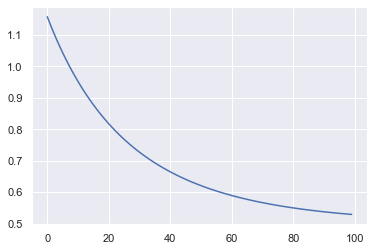

In [32]:
plt.plot(nn.errors);

In [33]:
def plot_different_lr():
    plt.figure(figsize=(12,12))
    for i, lr in enumerate([0.001, 0.01, 0.1, 0.4, 0.5, 0.6]):
        np.random.seed(1)
        model = [Linear(3, 5, "Linear 1"), Sigmoid(), Linear(5, 1, "Linear 3"), MSE(y)]
        nn = NeuralNetwork(model, alpha=lr)
        nn.fit(X)
        plt.subplot(2,3, i+1)
        plt.title(lr)
        plt.plot(nn.errors);

<ipython-input-25-2e7c433e586a>:3: RuntimeWarning: overflow encountered in exp
  self.values = 1.0 / (1.0 + np.exp(-X))


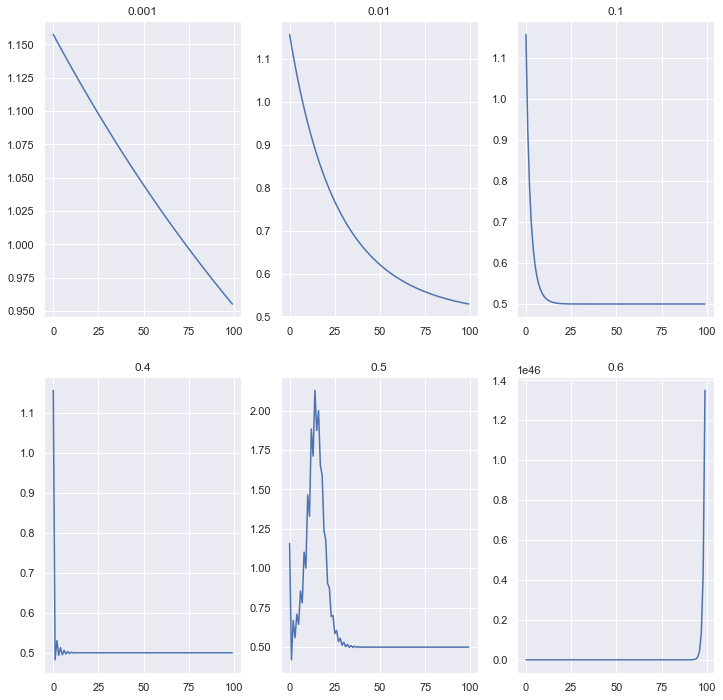

In [34]:
plot_different_lr()

# Да го сравним с `LinearRegression`

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
boston = load_boston()
X = boston.data
X = StandardScaler().fit(X).transform(X)
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(X, y)

regressor = LinearRegression().fit(x_train, y_train)
print("train score:", regressor.score(x_train, y_train))
print("test score:", regressor.score(x_test, y_test))


train score: 0.7369578681676506
test score: 0.7424891408655196


In [37]:
x_train.shape

(379, 13)

In [38]:
np.random.seed(1)
model = [
    Linear(13, 100, "Linear 1"),
    Sigmoid(),

    Linear(100, 50, "Linear 2"),
    Sigmoid(),
    
    Linear(50, 1, "Linear 3"),
    MSE(y_train)
]

nn = NeuralNetwork(model, alpha=0.0001, iterations=1000)
nn.fit(x_train);

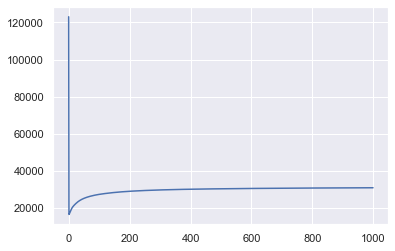

In [39]:
plt.plot(nn.errors);

In [40]:
print(r2_score(y_train, nn.predict(x_train)))
print(r2_score(y_test, nn.predict(x_test)))

0.9757453146501641
0.8322370814482815


# В допълнение: 

Многослойният персептрон (MLP) е само един от многобройните видове невронни мрежи, които съществуват. Някои основни други видове мрежи са: 
- **Конвулюционни невронни мрежи (CNNs)** - основният тип невронни мрежи за работа с изображения.
- **Рекурентни невронни мрежи (RNNs)** - за обработка на последователни данни - текстове, времеви редове и др. 
- **Трансформъри (Transformers)** - Изключително сложни мрежи, в основата на съвременните модели за машинен превод и генериране на текст (като GPT-3 и ChatGPT).

За имплементацията и използването на невронни мрежи в python, обикновено не се използва `sklearn`, а някои от библиотеките за дълбоко обучение (*deep learning*): 
- [PyTorch](https://pytorch.org/)
- [TensoFlow](https://www.tensorflow.org/)
- [Hugging Face](https://huggingface.co/models)
-  др.